In [26]:
import os
import shutil
import cv2
from matplotlib import pyplot as plt
import numpy as np
import rawpy
from psd_tools import PSDImage

In [27]:
fu = 'C:\\Users\\matchumen\\Desktop\\DCIM\\Screenshots\\puč.jpg'
bla = cv2.imdecode(np.fromfile(fu, dtype=np.uint8),
                   cv2.IMREAD_UNCHANGED)

In [33]:
root = r'C:\Users\Babu Frik\Desktop\nesetrideno'
dest = '\\'.join(root.split('\\')[:-1]) + '\\thumbs'
os.listdir(root)
print(dest)

C:\Users\Babu Frik\Desktop\thumbs


In [37]:
def create_directory_tree(root_path):
    dest = '\\'.join(root_path.split('\\')[:-1]) + '\\thumbs'
    if not os.path.exists(dest):
        os.mkdir(dest)
    for root, dirs, files in os.walk(root_path, topdown=False):
        newroot = root.replace(root_path, dest)
        for dirctr in dirs:
            try:
                newdirpath = os.path.join(newroot, dirctr)
                os.makedirs(newdirpath)
            except OSError as ose:
                pass
        for file in files:
            orig_path = os.path.join(root, file)
            new_path = os.path.join(newroot, file)
            try:
                thumb = create_thumbnail(orig_path)
                cv2.imwrite(new_path, thumb, [int(cv2.IMWRITE_JPEG_QUALITY), 75])
            except Exception as e:
                print(str(orig_path) + " " + str(e))

In [38]:
create_directory_tree(root)

C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\p1.raw name 'path' is not defined
C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\wood_grain.gif 'NoneType' object has no attribute 'shape'
C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\zabradli.psd 'Image' object has no attribute 'shape'
C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\zločin.ai FORMAT NOT SUPPORTED
C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\zločin.jpg 'NoneType' object has no attribute 'shape'
C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\zločin_final.jpg 'NoneType' object has no attribute 'shape'
C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\ZYxr2Z.gif 'NoneType' object has no attribute 'shape'
C:\Users\Babu Frik\Desktop\nesetrideno\video\21130001.MOV FORMAT NOT SUPPORTED
C:\Users\Babu Frik\Desktop\nesetrideno\video\21300002.MOV FORMAT NOT SUPPORTED
C:\Users\Babu Frik\Desktop\nesetrideno\video\21450003.MOV FORMAT NOT SUPPORTED
C:\Users\Babu Frik\Desktop\nesetrideno\video\21450004.MOV FORMAT NOT SUPPORT

C:\Users\Babu Frik\Desktop\nesetrideno\1 (4).png NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\1 (5).png NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\103.PNG NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\104.png NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\10410570_1400030883647797_6421284827179920184_n.jpg NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\10950_10205765288347130_5760424420603837154_n.jpg NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\12.zip FORMAT NOT SUPPORTED
C:\Users\Babu Frik\Desktop\nesetrideno\1205_elektricke-schema – kopie.jpg 'NoneType' object has no attribute 'shape'
C:\Users\Babu Frik\Desktop\nesetrideno\1206BK3.jpg NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\12106-200.png NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\13487509_10201952147841064_1647864510_n.jpg NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\13a.jpg NOT BIG ENOUGH
C:\Users\Babu Frik\Desktop\nesetrideno\14112073_126669711334

KeyboardInterrupt: 

In [5]:
def get_files_list(root_path):
    fp_list = []
    for root, _, files in os.walk(root_path, topdown=False):
        for fn in files:
            fp_list.append(os.path.join(root, fn))
    return fp_list

In [6]:
fp_list = get_files_list(root)

In [7]:
ext_set = set([fp.split('.')[-1].upper() for fp in fp_list])
print(ext_set)

{'DNG', 'CDR', 'CR2', 'MOV', 'MCF', 'BMP', 'JPG', 'EPS', 'TIF', 'PDF', 'PNG', 'ZIP', 'PSD', 'AI', 'JPEG', 'MP4', 'RAW', 'GIF'}


In [8]:
min_dimensions = (300, 300)
min_size = 50000
allowed_ext = {'JPG', 'TIF', 'TIFF', 'CR2', 'PSD', 'PNG', 'JPEG', 'RAW', 'DNG', 'GIF', 'BMP'}
img_paths_list = [fp for fp in fp_list if fp.split('.')[-1].upper() in allowed_ext]
print(img_paths_list)

['C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\p1.raw', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\web.PNG', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\web_gombik_bavorsko.jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\werich (2).jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\werich (3).jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\werich kopie.jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\WHO data (1).png', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\wien kopie.jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\wood_grain.gif', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\worldmap.jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\wotaznik.jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\zabradli.psd', 'C:\\Users\\Babu Frik\\Desktop\\nesetrideno\\shit\\fuck\\Zari_2012_051.jpg', 'C:\\Users\\Babu Frik\\Desktop\\nesetriden

In [9]:
print(len(img_paths_list))

1839


In [45]:
def load_cv2(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    plt.imshow(img)
    return img

def load_rawpy(img_path):
    with rawpy.imread(img_path) as raw:
        rgb = raw.postprocess()
        return rgb
    
def load_psd(img_path):
    psd = PSDImage.open(img_path)
    shizz = psd.composite().convert('RGB')
    return shizz

<class 'numpy.ndarray'>
(100, 100, 3)


True

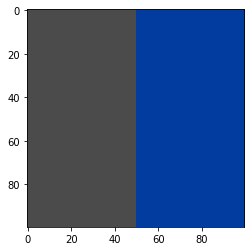

In [12]:
bla = load_psd(r'C:\Users\Babu Frik\Downloads\Matest.psd')

import numpy as np

cvi = np.array(bla)
print(type(cvi))
print(cvi.shape)
plt.imshow(cvi)
cv2.imwrite("fuck.jpg", cvi)

In [36]:
def create_thumbnail(img_path, long_side=800, compression=75):
    limit = 300
    allowed_ext = {'JPG', 'TIF', 'TIFF', 'CR2', 'PSD', 'PNG', 'JPEG', 'RAW', 'DNG', 'GIF', 'BMP'}
    input_ext = img_path.split('.')[-1].upper()
    
    assert input_ext in allowed_ext, "FORMAT NOT SUPPORTED"
    
    cv2_ext = {'JPG', 'TIF', 'TIFF', 'PNG', 'JPEG', 'GIF', 'BMP'}
    rawpy_ext = {'TIF', 'TIFF', 'CR2', 'RAW', 'DNG'}
    psd_ext = {'PSD'}
    
    img = None
    
    if input_ext in cv2_ext:
        img = load_cv2(img_path)
    
    if input_ext in rawpy_ext:
        img = load_rawpy(img_path)
    
    if input_ext in psd_ext:
        img = load_psd(img_path)
    
    #filter by resolution
    if img.shape[0] < limit or img.shape[1] < limit:
        print(str(img_path) + " NOT BIG ENOUGH")
    
    h = img.shape[0]
    w = img.shape[1]
    if h < w:
        new_w = long_side
        new_h = int(h / w * long_side)
    else:
        new_w = int(w / h * long_side)
        new_h = long_side
        
    resized = cv2.resize(img, (new_w, new_h))
    
    return resized

<class 'NoneType'>


TypeError: Image data of dtype object cannot be converted to float

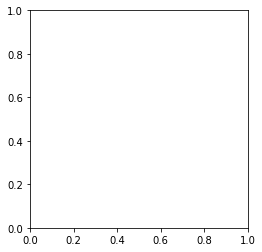

In [60]:
bla = cv2.imread(r'C:\Users\Babu Frik\Desktop\nesetrideno\shit\fuck\wood_grain.gif', 0)
print(type(bla))
plt.imshow(bla)